In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
import os

%matplotlib inline
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [19]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [21]:
df = df[['Name','Platform','Year_of_Release','Genre', 'Publisher', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales','Developer', 'Rating']]

In [22]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN


In [23]:
null_cols = df.isnull().sum()
null_cols

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Developer          6623
Rating             6769
dtype: int64

In [24]:
df['Publisher'] = np.where(df['Publisher'].isna()==True, df['Developer'], df['Publisher'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16674 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(6)
memory usage: 1.5+ MB


In [26]:
df.drop(['Developer'], axis=1, inplace=True)

In [27]:
df['Rating'].fillna('U', inplace=True)

In [28]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,U


In [29]:
df = df.rename(columns={'index':'rank'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16674 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Rating             16719 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [31]:
df = df.dropna()

In [32]:
df.reset_index(inplace=True)

In [33]:
df = df.rename(columns={'index':'rank'})

In [34]:
df['rank'] = df['rank'].apply(lambda x: x+1)

In [71]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

In [72]:
df.head()

,rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,E
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,U
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,E
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,E
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,U


# Explore Sales Data

In [84]:
sns.set()

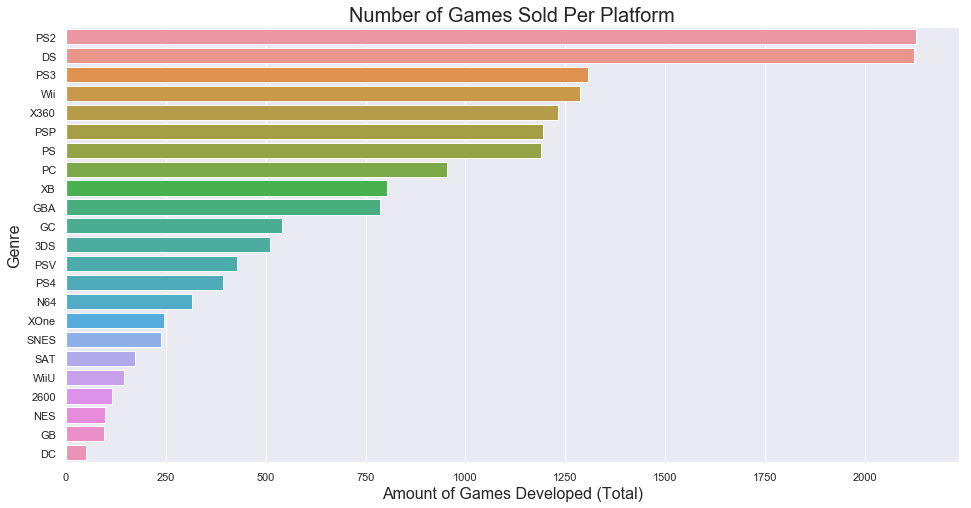

In [73]:
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
platGenreTotal = platGenreTotal[platGenreTotal>50]


plt.figure(figsize=(16,8))
ax = sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')

ax.set_xlabel(xlabel='Amount of Games Developed (Total)', fontsize=16)
ax.set_ylabel(ylabel="Genre", fontsize=16)
ax.set_title(label="Number of Games Sold Per Platform", fontsize=20)



plt.show()


In [74]:
platGenre['Total'] = platGenre.sum(axis=1)

In [75]:
platGenre.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,10,0,116
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,187,37,14,54,28,20,10,87,6,29,25,15,512
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,333,236,36,387,89,234,66,196,42,279,146,78,2122


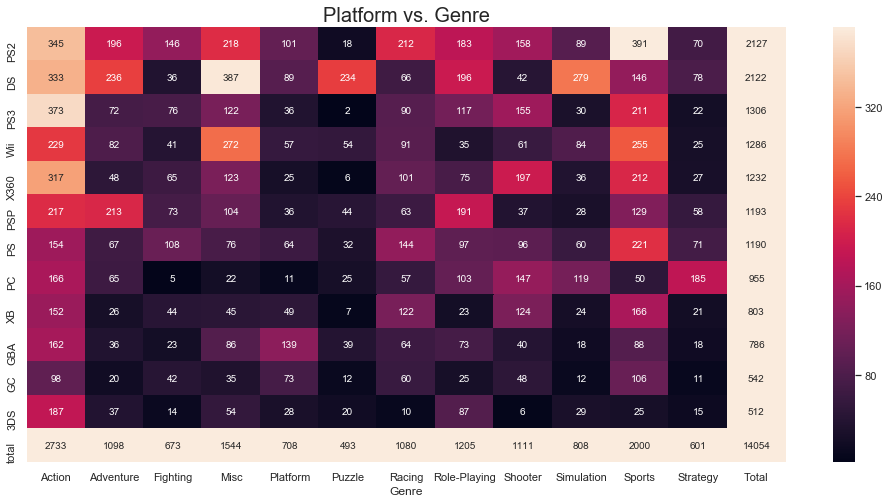

In [76]:

popPlatform = platGenre[platGenre['Total']>500].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)

plt.figure(figsize=(17,8))
ax = sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
ax.set_title(label="Platform vs. Genre", fontsize=20)
#plt.xticks(rotation = 90)
plt.show()

In [77]:
popPlatformfinal

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
PS2,345,196,146,218,101,18,212,183,158,89,391,70,2127
DS,333,236,36,387,89,234,66,196,42,279,146,78,2122
PS3,373,72,76,122,36,2,90,117,155,30,211,22,1306
Wii,229,82,41,272,57,54,91,35,61,84,255,25,1286
X360,317,48,65,123,25,6,101,75,197,36,212,27,1232
PSP,217,213,73,104,36,44,63,191,37,28,129,58,1193
PS,154,67,108,76,64,32,144,97,96,60,221,71,1190
PC,166,65,5,22,11,25,57,103,147,119,50,185,955
XB,152,26,44,45,49,7,122,23,124,24,166,21,803
GBA,162,36,23,86,139,39,64,73,40,18,88,18,786


In [6]:
sns.set()

In [12]:
platYearTotal[platYearTotal>50]

Platform
PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      431
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
dtype: int64

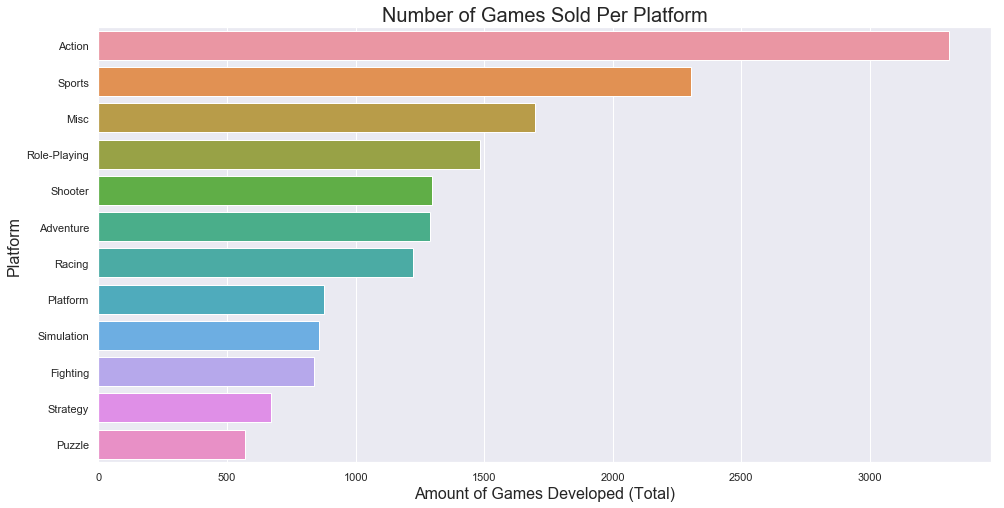

In [84]:
platYearTotal = pd.crosstab(df.Genre,df['Year_of_Release'])
platYearTotal = platYearTotal.sum(axis=1).sort_values(ascending = False)
platYearTotal2 = platYearTotal[platYearTotal>50]

plt.figure(figsize=(16,8))
ax = sns.barplot(y = platYearTotal2.index, x = platYearTotal.values, orient='h')

ax.set_xlabel(xlabel='Amount of Games Developed (Total)', fontsize=16)
ax.set_ylabel(ylabel="Platform", fontsize=16)
ax.set_title(label="Number of Games Sold Per Platform", fontsize=20)


plt.show()




In [85]:
platYear['Total'] = platYear.sum(axis=1)

In [86]:
platYear

Year_of_Release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0,Total
Platform,,,,,,,,,,,,,,,,,,,,,
2600,9,46,36,11,1,1,2,6,2,2,...,0,0,0,0,0,0,0,0,0,348
3DO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3DS,0,0,0,0,0,0,0,0,0,0,...,0,116,93,91,80,86,46,0,0,1536
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,156
DS,0,0,0,0,0,1,0,0,0,0,...,323,153,23,8,0,0,0,0,1,6366
GB,0,0,0,0,0,0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,291
GBA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2433
GC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1626
GEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87


In [68]:
platYear1985 = platYear.copy().iloc[:,15:]
platYear1985.head()

Year_of_Release,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0,Total
Platform,,,,,,,,,,,,,,,,,,,,,
2600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,116
3DO,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3DS,0,0,0,0,0,0,0,0,0,0,...,0,116,93,91,80,86,46,0,0,512
DC,0,0,0,7,14,20,8,1,0,0,...,0,0,0,0,0,0,0,0,0,52
DS,0,0,0,0,0,0,0,0,0,23,...,323,153,23,8,0,0,0,0,1,2122


In [69]:
platYear1985.head()

Year_of_Release,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0,Total
Platform,,,,,,,,,,,,,,,,,,,,,
2600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,116
3DO,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3DS,0,0,0,0,0,0,0,0,0,0,...,0,116,93,91,80,86,46,0,0,512
DC,0,0,0,7,14,20,8,1,0,0,...,0,0,0,0,0,0,0,0,0,52
DS,0,0,0,0,0,0,0,0,0,23,...,323,153,23,8,0,0,0,0,1,2122


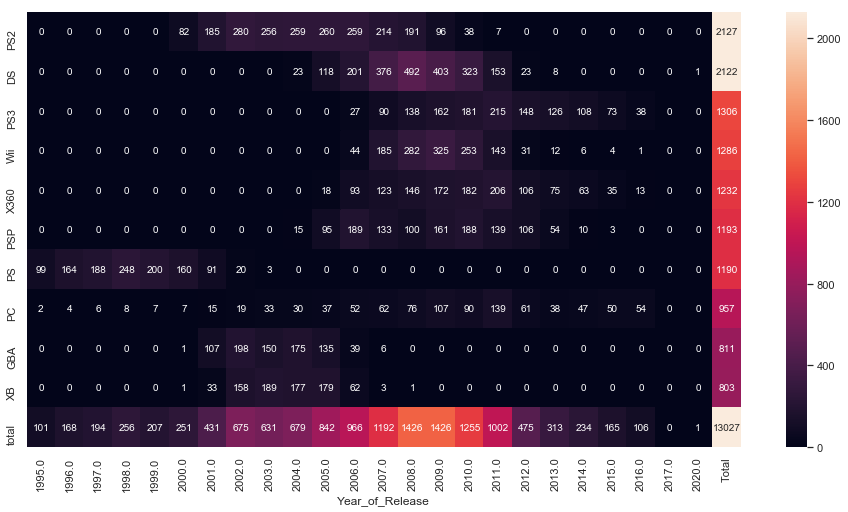

In [70]:
platYear1985 = platYear.copy().iloc[:,15:]


popPlatform2 = platYear1985[(platYear1985['Total']>800)].sort_values(by='Total', ascending = False)
neededdata2 = popPlatform2.loc[:,:]
maxi2 = neededdata2.values.max()
mini2 = neededdata2.values.min()
popPlatformfinal2 = popPlatform2.append(pd.DataFrame(popPlatform2.sum(), columns=['total']).T, ignore_index=False)

plt.figure(figsize=(16,8))
sns.heatmap(popPlatformfinal2, vmin = mini2, vmax = maxi2, annot=True, fmt="d")
#plt.xticks(rotation = 90)
plt.show()

In [185]:
df.head()

,rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,E
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,U
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,E
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,E
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,U


In [88]:
GenreGT = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales'].T

In [89]:
GenreGT['Total'] = GenreGT.sum(axis=1)

In [90]:
GenreGT['Action%'] = GenreGT['Action']/GenreGT['Total']
GenreGT['Adventure%'] = GenreGT['Adventure']/GenreGT['Total']
GenreGT['Fighting%'] = GenreGT['Fighting']/GenreGT['Total']
GenreGT['Misc%'] = GenreGT['Misc']/GenreGT['Total']

GenreGT['Platform%'] = GenreGT['Platform']/GenreGT['Total']
GenreGT['Puzzle%'] = GenreGT['Puzzle']/GenreGT['Total']
GenreGT['Racing%'] = GenreGT['Racing']/GenreGT['Total']
GenreGT['Role-Playing%'] = GenreGT['Role-Playing']/GenreGT['Total']
GenreGT['Shooter%'] = GenreGT['Shooter']/GenreGT['Total']

GenreGT['Simulation%'] = GenreGT['Simulation']/GenreGT['Total']
GenreGT['Sports%'] = GenreGT['Sports']/GenreGT['Total']
GenreGT['Strategy%'] = GenreGT['Strategy']/GenreGT['Total']

In [91]:
GenreGT

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,...,Fighting%,Misc%,Platform%,Puzzle%,Racing%,Role-Playing%,Shooter%,Simulation%,Sports%,Strategy%
NA_Sales,863.17,101.39,220.51,394.01,444.44,121.13,356.86,330.04,584.83,180.67,...,0.050856,0.090869,0.102500,0.027936,0.082302,0.076116,0.134878,0.041667,0.154797,0.015625
EU_Sales,510.99,63.15,99.00,208.55,199.39,49.78,234.48,188.24,314.52,113.32,...,0.041292,0.086985,0.083164,0.020763,0.097800,0.078514,0.131184,0.047265,0.154880,0.018682
JP_Sales,160.14,52.22,87.28,107.02,130.71,56.68,56.63,353.44,38.68,63.64,...,0.067624,0.082918,0.101273,0.043915,0.043876,0.273842,0.029969,0.049308,0.104543,0.038197
Other_Sales,182.22,16.37,35.87,73.00,51.01,12.30,75.51,59.41,103.33,30.59,...,0.045837,0.093285,0.065184,0.015718,0.096492,0.075918,0.132043,0.039090,0.168948,0.013712
Global_Sales,1717.62,233.25,442.63,783.19,825.86,240.33,723.69,930.90,1041.83,388.37,...,0.050237,0.088889,0.093732,0.027276,0.082136,0.105653,0.118243,0.044078,0.148724,0.019618


In [92]:
GenreG = GenreGT.T

In [93]:

GenreG['NA_Sales%'] = GenreG['NA_Sales']/GenreG['Global_Sales']
GenreG['EU_Sales%'] = GenreG['EU_Sales']/GenreG['Global_Sales']
GenreG['JP_Sales%'] = GenreG['JP_Sales']/GenreG['Global_Sales']
GenreG['Other_Sales%'] = GenreG['Other_Sales']/GenreG['Global_Sales']

In [94]:
GenreG.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Genre,,,,,,,,,
Action,863.17,510.99,160.14,182.22,1717.62,0.502538,0.297499,0.093234,0.106089
Adventure,101.39,63.15,52.22,16.37,233.25,0.434684,0.270740,0.223880,0.070182
Fighting,220.51,99.00,87.28,35.87,442.63,0.498181,0.223663,0.197185,0.081038
Misc,394.01,208.55,107.02,73.00,783.19,0.503084,0.266283,0.136646,0.093209
Platform,444.44,199.39,130.71,51.01,825.86,0.538154,0.241433,0.158271,0.061766


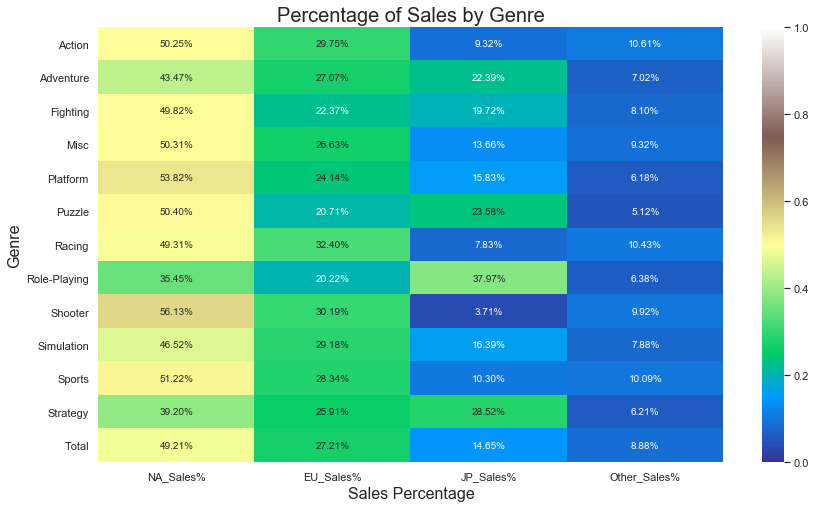

In [96]:
plt.figure(figsize=(14,8))

ax=sns.heatmap(GenreG.loc[:'Total','NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%',cmap='terrain')

ax.set_xlabel(xlabel='Sales Percentage', fontsize=16)
ax.set_ylabel(ylabel="Genre", fontsize=16)
ax.set_title(label="Percentage of Sales by Genre", fontsize=20)

plt.show()

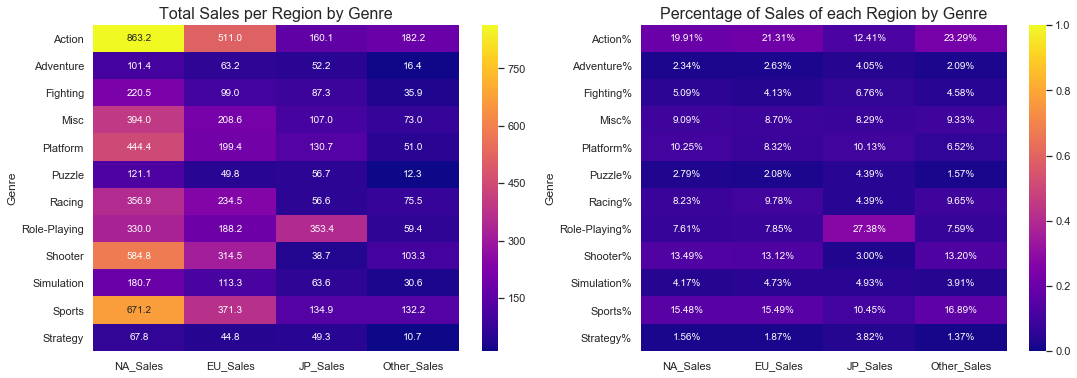

In [97]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(18,6))


ax1.set_title("Total Sales per Region by Genre", fontsize=16)
sns.heatmap(GenreG.loc['Action':'Strategy','NA_Sales':'Other_Sales'], annot=True, fmt = '.1f', ax=ax1, cmap='plasma')


ax2.set_title("Percentage of Sales of each Region by Genre",fontsize=16)

sns.heatmap(GenreG.loc['Action%':'Strategy%','NA_Sales':'Other_Sales'], vmax =1, vmin=0, annot=True, fmt = '.2%', ax=ax2, cmap='plasma')



plt.show()

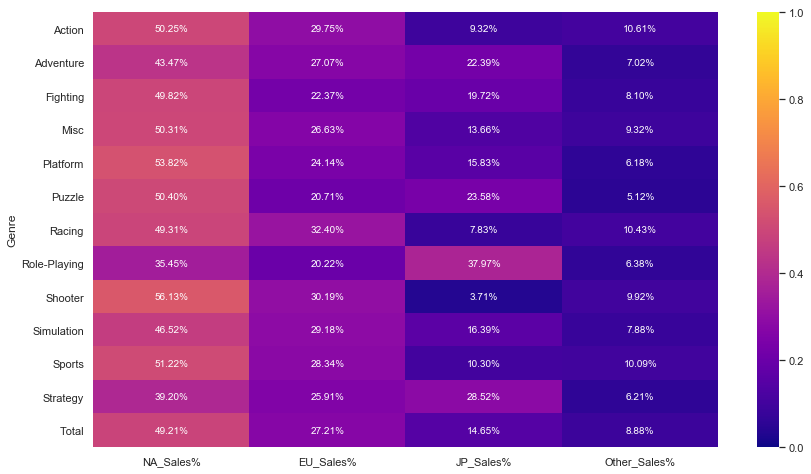

In [99]:

plt.figure(figsize=(14,8))

sns.heatmap(GenreG.loc[:'Total','NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%', cmap='plasma')



plt.show()

In [236]:
PubGroup10

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Publisher,,,,,,,,,
Nintendo,815.86,418.58,457.74,94.55,1786.72,0.456624,0.234273,0.256190,0.052918
Electronic Arts,588.65,370.02,14.29,126.82,1100.05,0.535112,0.336367,0.012990,0.115286
Activision,428.92,214.10,6.71,75.27,725.14,0.591500,0.295253,0.009253,0.103801
Sony Computer Entertainment,266.17,186.40,74.15,79.62,606.27,0.439029,0.307454,0.122305,0.131328
Ubisoft,252.12,161.72,7.35,49.09,470.45,0.535912,0.343756,0.015623,0.104347
Take-Two Interactive,222.92,119.06,5.93,55.68,403.58,0.552356,0.295010,0.014693,0.137965
THQ,207.55,93.66,5.01,31.87,338.11,0.613853,0.277010,0.014818,0.094259
Konami Digital Entertainment,88.67,67.93,91.03,29.54,277.36,0.319693,0.244916,0.328202,0.106504
Sega,107.99,80.08,56.22,23.59,268.11,0.402782,0.298683,0.209690,0.087986


In [101]:
PubGroup = df.groupby(['Publisher']).sum().loc[:, 'NA_Sales':'Global_Sales']
PubGroup['NA_Sales%'] = PubGroup['NA_Sales']/PubGroup['Global_Sales']
PubGroup['EU_Sales%'] = PubGroup['EU_Sales']/PubGroup['Global_Sales']
PubGroup['JP_Sales%'] = PubGroup['JP_Sales']/PubGroup['Global_Sales']
PubGroup['Other_Sales%'] = PubGroup['Other_Sales']/PubGroup['Global_Sales']

In [102]:
PubGroup = PubGroup.sort_values(by='Global_Sales', ascending = False)

In [103]:
PubGroup10 = PubGroup[:10]

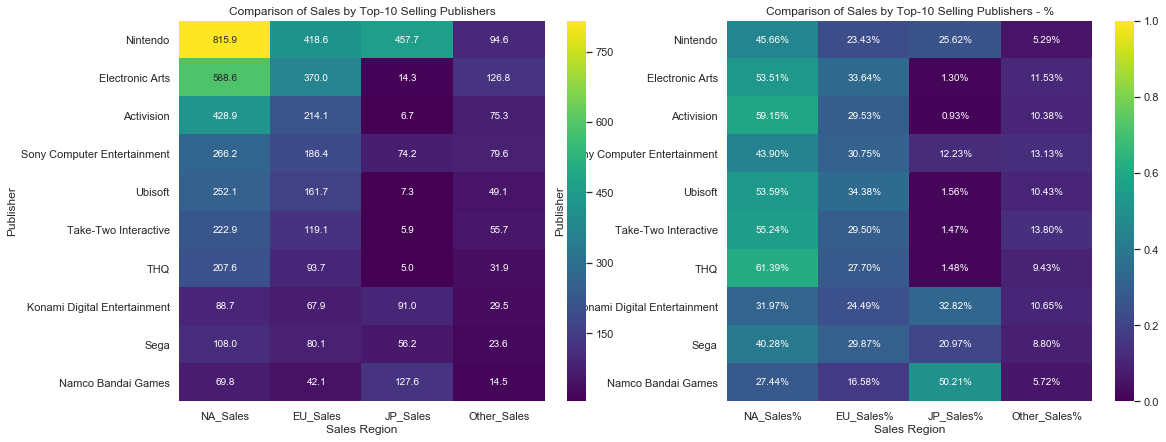

In [104]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(18,7))


ax1.set_title("Comparison of Sales by Top-10 Selling Publishers")
sns.heatmap(PubGroup10.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f', ax=ax1,cmap='viridis')

ax1.set_xlabel('Sales Region')

ax2.set_title("Comparison of Sales by Top-10 Selling Publishers - %")

sns.heatmap(PubGroup10.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%', ax=ax2, cmap='viridis')

ax2.set_xlabel('Sales Region')

plt.show()

In [105]:
PubGroup.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Publisher,,,,,,,,,
Nintendo,815.86,418.58,457.74,94.55,1786.72,0.456624,0.234273,0.256190,0.052918
Electronic Arts,588.65,370.02,14.29,126.82,1100.05,0.535112,0.336367,0.012990,0.115286
Activision,428.92,214.10,6.71,75.27,725.14,0.591500,0.295253,0.009253,0.103801
Sony Computer Entertainment,266.17,186.40,74.15,79.62,606.27,0.439029,0.307454,0.122305,0.131328
Ubisoft,252.12,161.72,7.35,49.09,470.45,0.535912,0.343756,0.015623,0.104347


In [106]:
PGT = PubGroup.T

In [107]:
PGT['Total'] = df.sum(axis=1)

In [108]:
PGT.head()

Publisher,Nintendo,Electronic Arts,Activision,Sony Computer Entertainment,Ubisoft,Take-Two Interactive,THQ,Konami Digital Entertainment,Sega,Namco Bandai Games,...,Red Flagship,Piacci,Commseed,Michaelsoft,Media Entertainment,Ascaron Entertainment,Lighthouse Interactive,Boost On,EON Digital Entertainment,Total
NA_Sales,815.86,588.65,428.92,266.17,252.12,222.92,207.55,88.67,107.99,69.76,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,NaN
EU_Sales,418.58,370.02,214.10,186.40,161.72,119.06,93.66,67.93,80.08,42.14,...,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,NaN
JP_Sales,457.74,14.29,6.71,74.15,7.35,5.93,5.01,91.03,56.22,127.62,...,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,NaN
Other_Sales,94.55,126.82,75.27,79.62,49.09,55.68,31.87,29.54,23.59,14.55,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Global_Sales,1786.72,1100.05,725.14,606.27,470.45,403.58,338.11,277.36,268.11,254.19,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN


In [109]:
PubGroup.loc['Total'] = PubGroup.sum()

In [110]:
PubGroup

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Publisher,,,,,,,,,
Nintendo,815.86,418.58,457.74,94.55,1786.72,0.456624,0.234273,0.256190,0.052918
Electronic Arts,588.65,370.02,14.29,126.82,1100.05,0.535112,0.336367,0.012990,0.115286
Activision,428.92,214.10,6.71,75.27,725.14,0.591500,0.295253,0.009253,0.103801
Sony Computer Entertainment,266.17,186.40,74.15,79.62,606.27,0.439029,0.307454,0.122305,0.131328
Ubisoft,252.12,161.72,7.35,49.09,470.45,0.535912,0.343756,0.015623,0.104347
Take-Two Interactive,222.92,119.06,5.93,55.68,403.58,0.552356,0.295010,0.014693,0.137965
THQ,207.55,93.66,5.01,31.87,338.11,0.613853,0.277010,0.014818,0.094259
Konami Digital Entertainment,88.67,67.93,91.03,29.54,277.36,0.319693,0.244916,0.328202,0.106504
Sega,107.99,80.08,56.22,23.59,268.11,0.402782,0.298683,0.209690,0.087986


In [111]:
PubGroupPer = PubGroup.copy().T

In [112]:
PubGroupPer = ((PubGroupPer.loc[:,:].div(PubGroupPer['Total'],axis=0))).T

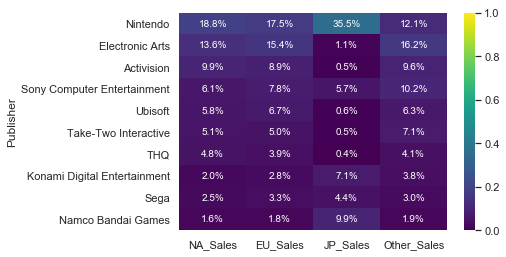

In [113]:
PubGroupPer10 = PubGroupPer.copy()[:10]
sns.heatmap(PubGroupPer10.loc[:,'NA_Sales':'Other_Sales'], vmax =1, vmin=0, annot=True, fmt = '.1%', cmap='viridis')



plt.show()

In [114]:
totals = PubGroup.loc['Total']

In [116]:
for key, value in PubGroupPer:
    value = value

ValueError: too many values to unpack (expected 2)

In [246]:
df.columns

Index(['rank', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Rating'],
      dtype='object')

In [117]:
df['Year_of_Release'] = df['Year_of_Release'].replace(2020, 2009)

In [118]:
df_y = df.groupby(['Year_of_Release']).sum()
df_y.reset_index(inplace=True)
df_y.head()

,Year_of_Release,rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,29755,10.59,0.67,0.00,0.12,11.38
1,1981,189931,33.40,1.96,0.00,0.32,35.77
2,1982,148806,26.92,1.65,0.00,0.31,28.86
3,1983,56587,7.76,0.80,8.10,0.14,16.79
4,1984,22883,33.28,2.10,14.27,0.70,50.36


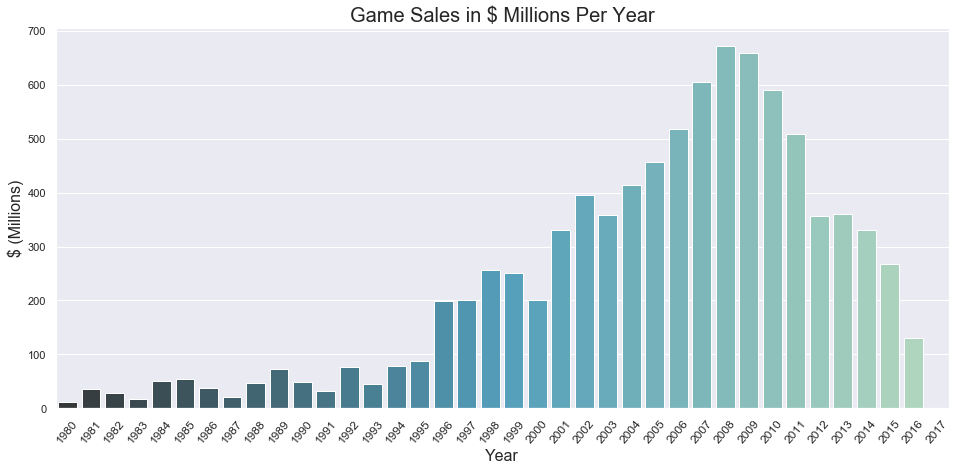

In [122]:
colors = sns.color_palette("GnBu_d", len(df_y['Year_of_Release']))
plt.figure(figsize=(16,7))
ax = sns.barplot(y = df_y['Global_Sales'], x = df_y['Year_of_Release'], palette=colors)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = df_y['Year_of_Release'], fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ (Millions)', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

In [124]:
PubRelease = df.groupby(['Publisher']).count().iloc[:,0]
PubRelease = pd.DataFrame(PubRelease.sort_values(ascending=False))[0:10]
publishers = PubRelease.index
PubRelease.columns = ['Releases']

colors = sns.color_palette("GnBu_d", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=PubRelease, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Publishers by Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show()

NameError: name 'data' is not defined

In [125]:
PubRevenue = df.groupby(['Publisher']).sum()['Global_Sales']
PubRevenue = pd.DataFrame(PubRevenue.sort_values(ascending=False))[0:10]
publishers = PubRevenue.index
PubRevenue.columns = ['Global Sales']

colors = sns.color_palette("Set3", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=PubRevenue, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();



NameError: name 'data' is not defined

In [307]:
Publisher = df.groupby(['Publisher']).count().iloc[:,0]
Publisher = pd.DataFrame(Publisher.sort_values(ascending=False))

Revenue = df.groupby(['Publisher']).sum()['Global_Sales']
Revenue = pd.DataFrame(Revenue.sort_values(ascending=False))

In [313]:
Pub = Publisher.join(Revenue,how='outer')

In [316]:
Pub.sort_values(by='rank',ascending=False, inplace=True)

In [318]:
Pub['Avg_Sales'] = Pub['Global_Sales']/Pub['rank']

In [327]:
Pub = (Pub[Pub['rank']>150])

In [329]:
Pub.sort_values(by='Avg_Sales',ascending=False, inplace=True)
Pub

,rank,Global_Sales,Avg_Sales
Publisher,,,
Nintendo,700,1786.72,2.552457
Microsoft Game Studios,191,248.32,1.300105
Take-Two Interactive,421,403.58,0.958622
Sony Computer Entertainment,686,606.27,0.883776
Electronic Arts,1344,1100.05,0.818490
Activision,976,725.14,0.742971
Warner Bros. Interactive Entertainment,220,140.74,0.639727
Square Enix,232,143.91,0.620302
Disney Interactive Studios,214,116.18,0.542897


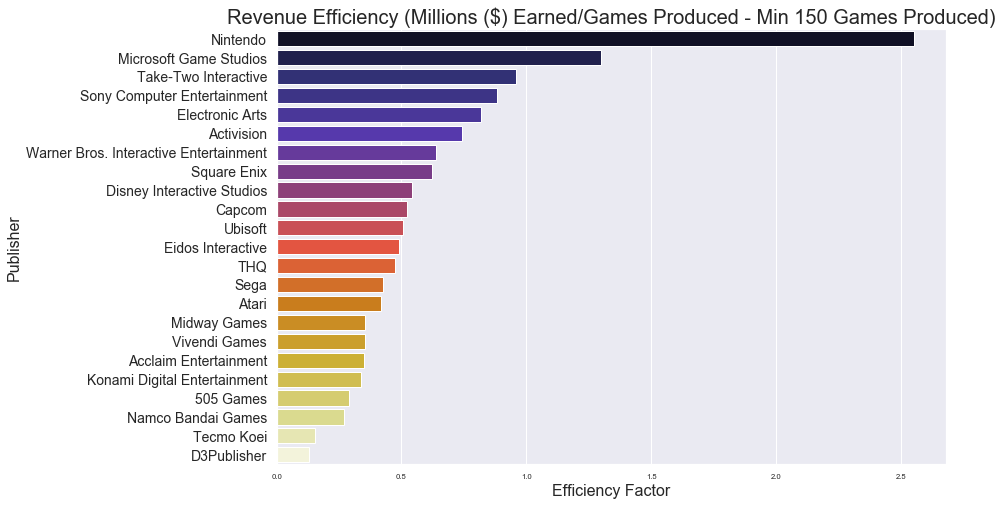

In [352]:

publishers = Pub.index

colors = sns.color_palette("CMRmap", len(Pub.index))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Avg_Sales', data=Pub, orient='h', palette=colors)
ax.set_xlabel(xlabel='Efficiency Factor', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Revenue Efficiency (Millions ($) Earned/Games Produced - Min 150 Games Produced)', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();


In [336]:
Genre = df.groupby(['Genre']).count().iloc[:,0]
Genre = pd.DataFrame(Genre.sort_values(ascending=False))

RevenueG = df.groupby(['Genre']).sum()['Global_Sales']
RevenueG = pd.DataFrame(RevenueG.sort_values(ascending=False))

GR = Genre.join(RevenueG,how='outer')
GR.sort_values(by='rank',ascending=False, inplace=True)
GR['Avg_Sales'] = GR['Global_Sales']/GR['rank']


In [337]:
GR = (GR[GR['rank']>150])
GR.sort_values(by='Avg_Sales',ascending=False, inplace=True)
GR

,rank,Global_Sales,Avg_Sales
Genre,,,
Platform,878,825.86,0.940615
Shooter,1296,1041.83,0.803881
Role-Playing,1483,930.90,0.627714
Racing,1225,723.69,0.590767
Sports,2306,1310.39,0.568252
Fighting,837,442.63,0.528829
Action,3307,1717.62,0.519389
Misc,1697,783.19,0.461514
Simulation,857,388.37,0.453174


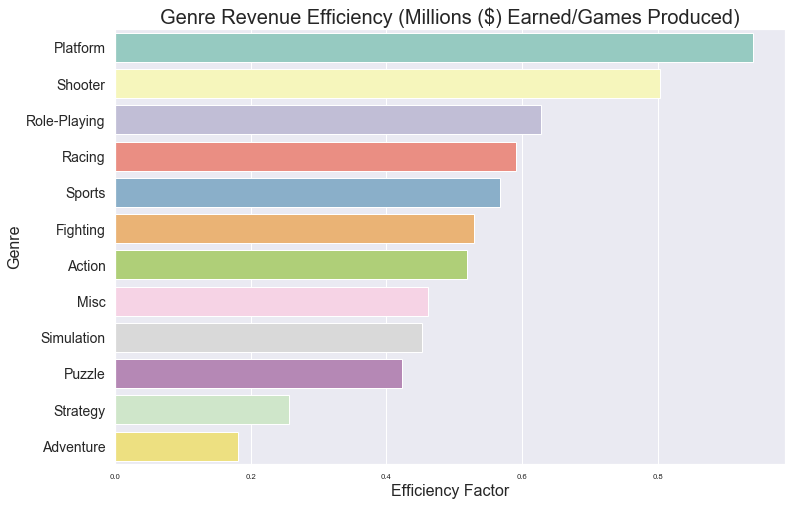

In [344]:
publishers = GR.index

colors = sns.color_palette("Set3", len(GR.index))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Avg_Sales', data=GR, orient='h', palette=colors)
ax.set_xlabel(xlabel='Efficiency Factor', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genre Revenue Efficiency (Millions ($) Earned/Games Produced)', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

In [468]:
Genre_STD = df.groupby(['Genre']).std()['Global_Sales']
Genre_STD = pd.DataFrame(Genre_STD.sort_values(ascending=False))
Genre_STD = Genre_STD.rename(columns={'Global_Sales':'Global_Sales_STD'})
Genre_STD

,Global_Sales_STD
Genre,
Platform,2.587494
Sports,2.099598
Shooter,1.831543
Role-Playing,1.718215
Racing,1.671465
Puzzle,1.577094
Misc,1.321628
Simulation,1.196802
Action,1.153706


In [469]:
GR = GR.join(Genre_STD,how='outer')

In [470]:
GR

,rank,Global_Sales,Avg_Sales,Global_Sales_STD
Genre,,,,
Action,3307,1717.62,0.519389,1.153706
Adventure,1291,233.25,0.180674,0.505795
Fighting,837,442.63,0.528829,0.954169
Misc,1697,783.19,0.461514,1.321628
Platform,878,825.86,0.940615,2.587494
Puzzle,569,240.33,0.422373,1.577094
Racing,1225,723.69,0.590767,1.671465
Role-Playing,1483,930.90,0.627714,1.718215
Shooter,1296,1041.83,0.803881,1.831543


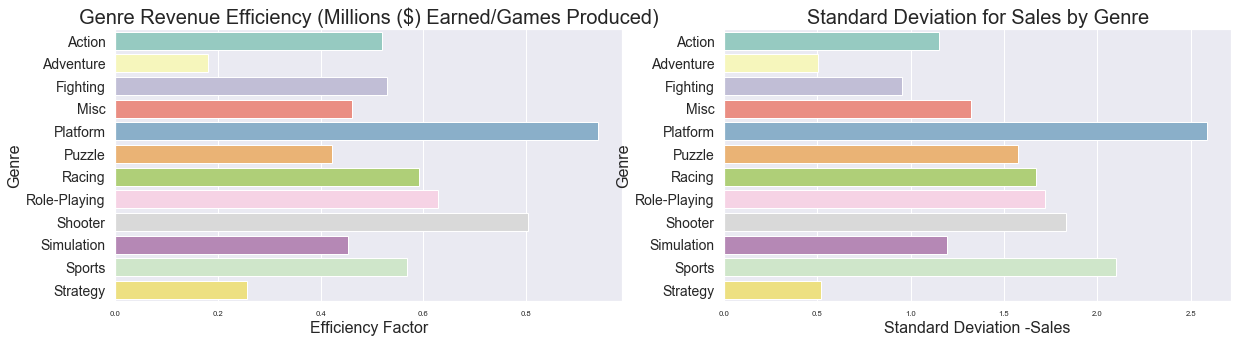

In [472]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,5))

publishers = GR.index

colors = sns.color_palette("Set3", len(GR.index))

ax1 = sns.barplot(y = publishers , x = 'Avg_Sales', data=GR, orient='h', palette=colors, ax=ax1)
ax1.set_xlabel(xlabel='Efficiency Factor', fontsize=16)
ax1.set_ylabel(ylabel='Genre', fontsize=16)
ax1.set_title(label='Genre Revenue Efficiency (Millions ($) Earned/Games Produced)', fontsize=20)
ax1.set_yticklabels(labels = publishers, fontsize=14)

ax2 = sns.barplot(y = publishers , x = 'Global_Sales_STD', data=GR, orient='h', palette=colors, ax=ax2)
ax2.set_xlabel(xlabel='Standard Deviation -Sales', fontsize=16)
ax2.set_ylabel(ylabel='Genre', fontsize=16)
ax2.set_title(label='Standard Deviation for Sales by Genre', fontsize=20)
ax2.set_yticklabels(labels = publishers, fontsize=14)


plt.show();



In [345]:
df_y

,Year_of_Release,rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,29755,10.59,0.67,0.00,0.12,11.38
1,1981,189931,33.40,1.96,0.00,0.32,35.77
2,1982,148806,26.92,1.65,0.00,0.31,28.86
3,1983,56587,7.76,0.80,8.10,0.14,16.79
4,1984,22883,33.28,2.10,14.27,0.70,50.36
5,1985,55638,33.73,4.74,14.56,0.92,53.94
6,1986,35927,12.50,2.84,19.81,1.93,37.07
7,1987,54640,8.46,1.41,11.63,0.20,21.74
8,1988,37265,23.87,6.59,15.76,0.99,47.22
9,1989,40148,45.15,8.44,18.36,1.50,73.45


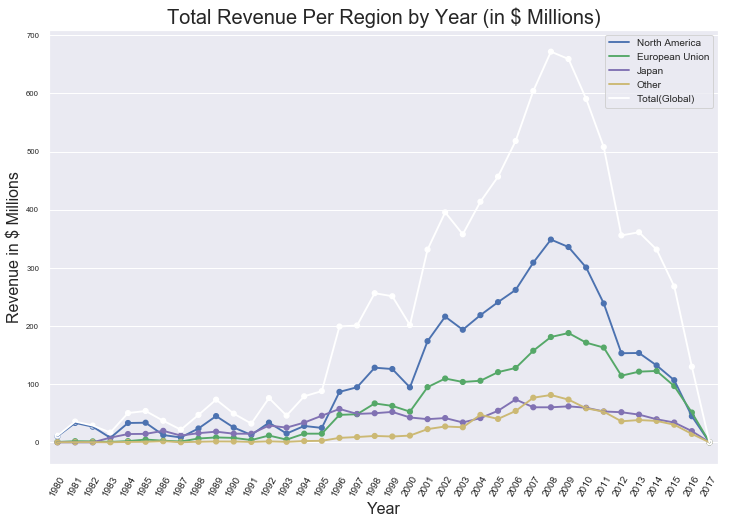

In [351]:
regions = ['North America','European Union','Japan','Other','Total(Global)']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=df_y['Year_of_Release'], y=df_y['NA_Sales'], color='b', scale=0.7)
ax = sns.pointplot(x=df_y['Year_of_Release'], y=df_y['EU_Sales'], color='g', scale=0.7)
ax = sns.pointplot(x=df_y['Year_of_Release'], y=df_y['JP_Sales'], color='m', scale=0.7)
ax = sns.pointplot(x=df_y['Year_of_Release'], y=df_y['Other_Sales'], color='y', scale=0.7)
ax = sns.pointplot(x=df_y['Year_of_Release'], y=df_y['Global_Sales'], color='w', scale=0.7)

ax.set_xticklabels(labels=df_y['Year_of_Release'], fontsize=10, rotation=60)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Total Revenue Per Region by Year (in $ Millions)', fontsize=20)
ax.legend(handles=ax.lines[::len(df_y['Year_of_Release'])+1], labels=regions, fontsize=10)
plt.show()

In [353]:
df_y.head()

,Year_of_Release,rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,29755,10.59,0.67,0.00,0.12,11.38
1,1981,189931,33.40,1.96,0.00,0.32,35.77
2,1982,148806,26.92,1.65,0.00,0.31,28.86
3,1983,56587,7.76,0.80,8.10,0.14,16.79
4,1984,22883,33.28,2.10,14.27,0.70,50.36


In [354]:
df.head()

,rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,E
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,U
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,E
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,E
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,U


In [126]:

plt.figure(figsize=(16,8))
sns.boxplot(x=df_10['Publisher'], y=df_10['Global_Sales'],data=df_10, palette="Set3")

plt.show()

NameError: name 'df_10' is not defined

<Figure size 1152x576 with 0 Axes>

In [363]:
df_10 = df[df['Publisher'].isin(Publishers10)]

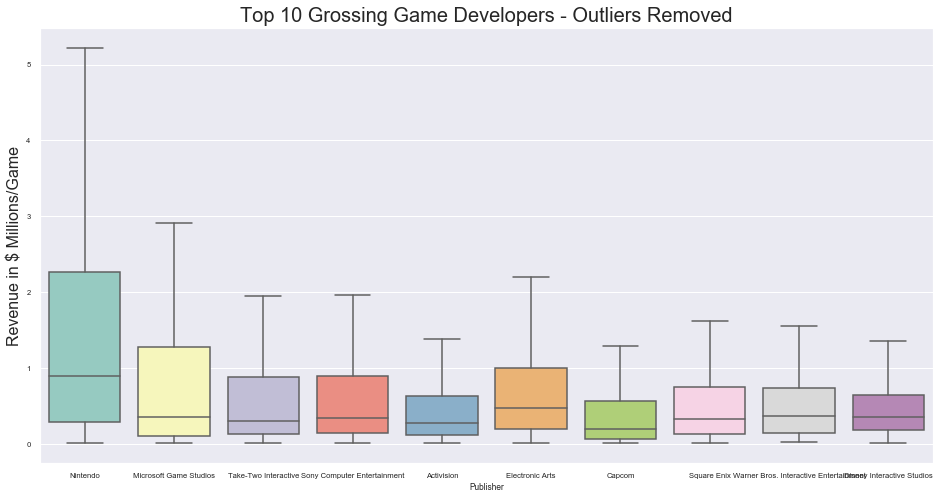

In [403]:


plt.figure(figsize=(16,8))
colors = sns.color_palette("GnBu_d", len(df_10['Publisher']))
ax = sns.boxplot(x=df_10['Publisher'], y=df_10['Global_Sales'],data=df_10, palette='Set3', showfliers=False)
ax.set_ylabel(ylabel='Revenue in $ Millions/Game', fontsize=16)
ax.set_title(label='Top 10 Grossing Game Developers - Outliers Removed', fontsize=20)
#ax.set_xticklabels(labels = df_10['Publisher'], fontsize=10, rotation=50)

plt.show()

Text(0.5, 0, 'Value')

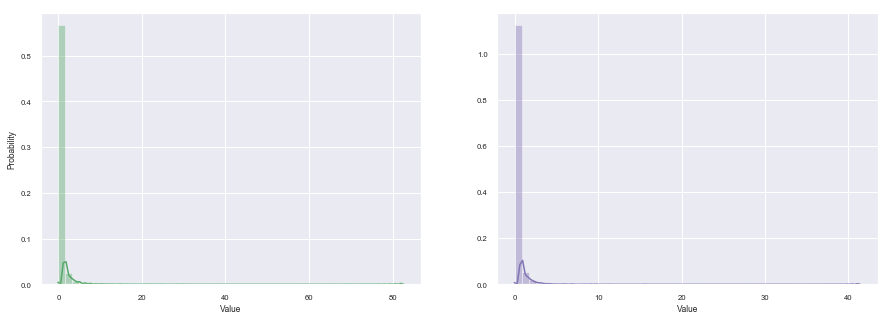

In [382]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,5))

x3 = df['Global_Sales']
sns.distplot(x3, bins=50, ax=ax1, color='g');

x4 = df['NA_Sales']
sns.distplot(x4, bins=50, ax=ax2, color='m');
   
ax1.set_ylabel('Probability')
ax1.set_xlabel('Value')
ax2.set_xlabel('Value')

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,5))

x3 = df['Global_Sales']
sns.distplot(x3, bins=50, ax=ax1, color='g');

x4 = df['NA_Sales']
sns.distplot(x4, bins=50, ax=ax2, color='m');
   
ax1.set_ylabel('Probability')
ax1.set_xlabel('Value')
ax2.set_xlabel('Value')

In [395]:
Q25 = df['Global_Sales'].quantile(0.25)
Q75 = df['Global_Sales'].quantile(0.75)
IQR = Q75-Q25
MaxQ = Q75+1.5*IQR
MinQ = max(Q25-1.5*IQR,0.05)
print(MinQ, MaxQ)

0.05 1.085


In [397]:
df_NoO = df[(df['Global_Sales']<MaxQ) & (df['Global_Sales']>MinQ)  ]

In [398]:
len(df_NoO)

10766

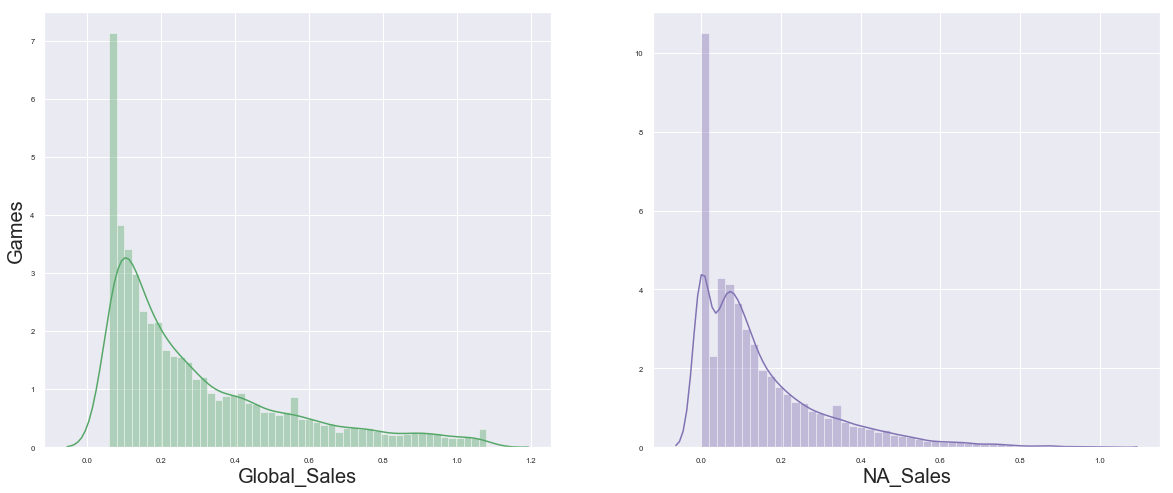

In [476]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,8))

x3 = df_NoO['Global_Sales']
sns.distplot(x3, bins=50, ax=ax1, color='g');

x4 = df_NoO['NA_Sales']
sns.distplot(x4, bins=50, ax=ax2, color='m');
   
ax1.set_ylabel('Games', fontsize=20)
ax1.set_xlabel('Global_Sales', fontsize=20)
ax2.set_xlabel('NA_Sales', fontsize=20)

plt.show()

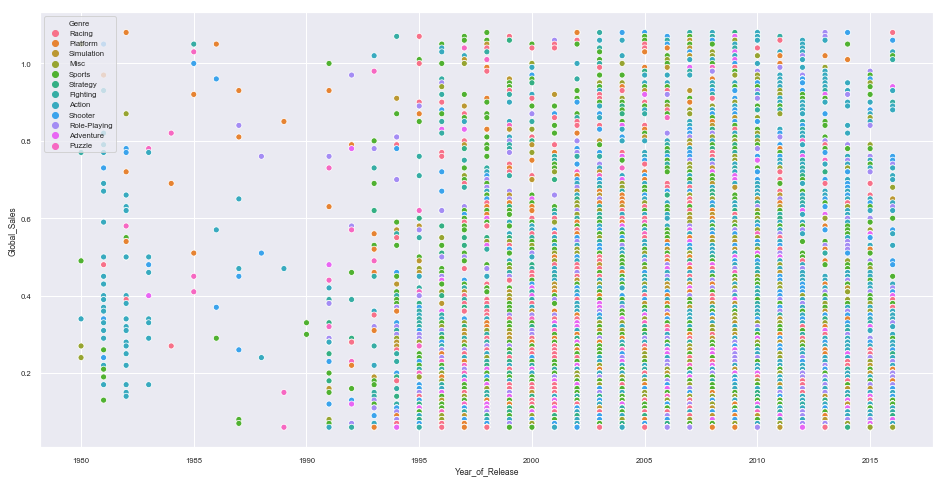

In [407]:
plt.figure(figsize=(16,8))
colors = sns.color_palette("GnBu_d", len(df_10['Publisher']))

sns.scatterplot(x='Year_of_Release',y='Global_Sales',data=df_NoO, hue='Genre') #Hue
plt.show()

In [408]:
df_NoO

,rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
1870,1893,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08,E
1871,1894,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002,Platform,THQ,0.53,0.41,0.00,0.14,1.08,E
1872,1895,Imagine: Babysitters,DS,2008,Simulation,Ubisoft,0.63,0.35,0.00,0.10,1.08,E
1873,1896,Namco Museum Battle Collection,PSP,2005,Misc,Sony Computer Entertainment,0.75,0.18,0.00,0.16,1.08,E10+
1874,1897,Fisherman's Bass Club,PS2,2002,Sports,Agetec,0.53,0.41,0.00,0.14,1.08,E
1875,1898,Empire: Total War,PC,2009,Strategy,Sega,0.01,0.97,0.00,0.10,1.08,T
1876,1899,Virtua Fighter 5,PS3,2007,Fighting,Sega,0.29,0.51,0.08,0.20,1.08,T
1877,1900,Dante's Inferno,PS3,2010,Action,Electronic Arts,0.64,0.28,0.04,0.13,1.08,M
1878,1901,Toy Story 3: The Video Game,PS3,2010,Action,Disney Interactive Studios,0.51,0.40,0.00,0.16,1.08,U
1879,1902,Joust,2600,1982,Platform,Atari,1.01,0.06,0.00,0.01,1.08,U


# Ratings

In [409]:
df['Rating'].value_counts()

U       6650
E       3922
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: Rating, dtype: int64

In [415]:
df['Rating'] = df['Rating'].replace('E10+','E')
df['Rating'] = df['Rating'].replace('K-A','E')
df['Rating'] = df['Rating'].replace('AO','M')
df['Rating'] = df['Rating'].replace('RP','E')
df['Rating'] = df['Rating'].replace('EC','E')

In [416]:
df['Rating'].value_counts()

U    6650
E    5327
T    2905
M    1537
Name: Rating, dtype: int64

In [417]:
df_r = df.copy()[df['Rating']!='U']

In [418]:
df_r.describe()

,rank,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000
mean,7561.213840,2007.581841,0.318953,0.183236,0.046463,0.064774,0.613674
std,4627.606887,4.099635,0.826094,0.587466,0.242862,0.230036,1.674504
min,1.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3544.000000,2004.000000,0.050000,0.010000,0.000000,0.010000,0.080000
50%,7341.000000,2008.000000,0.120000,0.040000,0.000000,0.020000,0.210000
75%,11324.000000,2010.000000,0.300000,0.150000,0.000000,0.050000,0.570000
max,16711.000000,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000


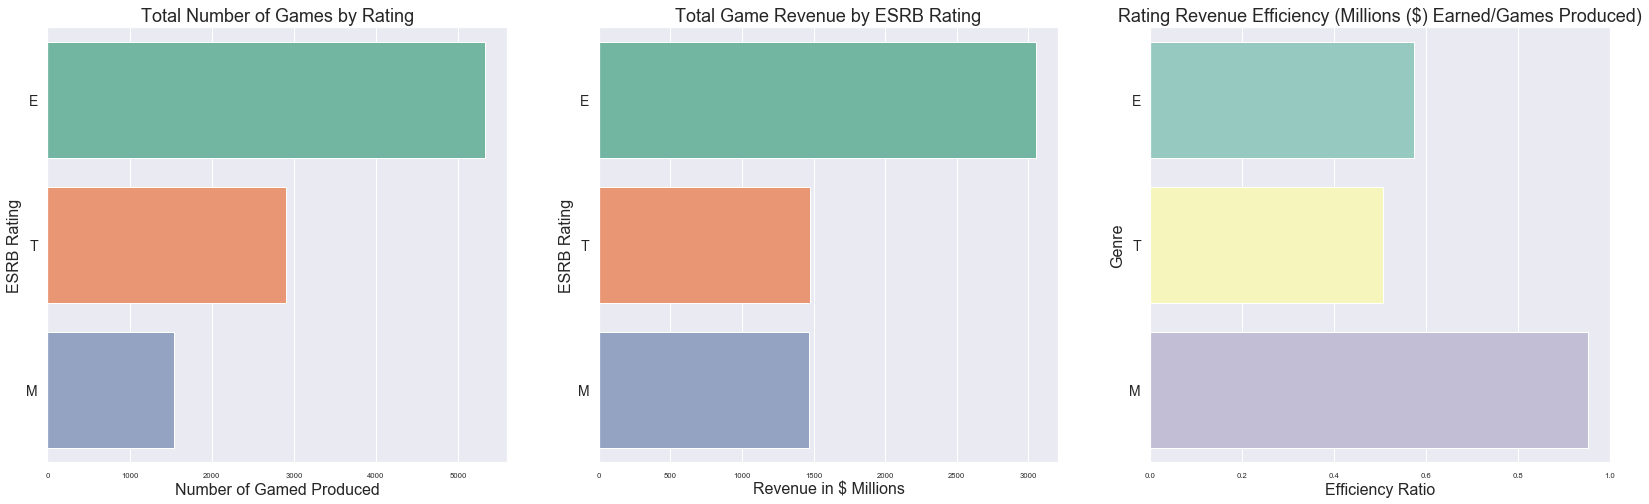

<Figure size 864x576 with 0 Axes>

In [462]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(28,8))

colors = sns.color_palette("Set2")

ratings = R_S.index

ax1 = sns.barplot(y = ratings , x = 'rank', data=R_S, orient='h', palette=colors, ax=ax1)
ax1.set_xlabel(xlabel='Number of Gamed Produced', fontsize=16)
ax1.set_ylabel(ylabel='ESRB Rating', fontsize=16)
ax1.set_title(label='Total Number of Games by Rating', fontsize=18)
ax1.set_yticklabels(labels = ratings, fontsize=14)



ax2 = sns.barplot(y = ratings , x = 'Global_Sales', data=R_S, orient='h', palette=colors, ax=ax2)
ax2.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax2.set_ylabel(ylabel='ESRB Rating', fontsize=16)
ax2.set_title(label='Total Game Revenue by ESRB Rating', fontsize=18)
ax2.set_yticklabels(labels = ratings, fontsize=14)



colors = sns.color_palette("Set3")
plt.figure(figsize=(12,8))
ax3 = sns.barplot(y = ratings , x = 'Avg_Sales', data=R_S, orient='h', palette=colors, ax=ax3)
ax3.set_xlabel(xlabel='Efficiency Ratio', fontsize=16)
ax3.set_ylabel(ylabel='Genre', fontsize=16)
ax3.set_title(label='Rating Revenue Efficiency (Millions ($) Earned/Games Produced)', fontsize=18)
ax3.set_yticklabels(labels = ratings, fontsize=14)



plt.show()

In [431]:
dfRating = df_r.groupby(['Rating']).count().iloc[:,0]
dfRating = pd.DataFrame(dfRating.sort_values(ascending=False))

Rg = df_r.groupby(['Rating']).sum()['Global_Sales']
RS = pd.DataFrame(Rg.sort_values(ascending=False))

R_S = dfRating.join(RS,how='outer')
R_S.sort_values(by='rank',ascending=False, inplace=True)
R_S['Avg_Sales'] = R_S['Global_Sales']/R_S['rank']


In [432]:
R_S

,rank,Global_Sales,Avg_Sales
Rating,,,
E,5327,3056.30,0.573738
T,2905,1474.13,0.507446
M,1537,1464.55,0.952863


In [458]:
R_S.columns

Index(['rank', 'Global_Sales', 'Avg_Sales'], dtype='object')